In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.impute import SimpleImputer

READING THE FILE

In [121]:
df = pd.read_csv('bengaluru_house_prices.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


CHECKING FOR ALL NULL VALUES

In [122]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

<Axes: >

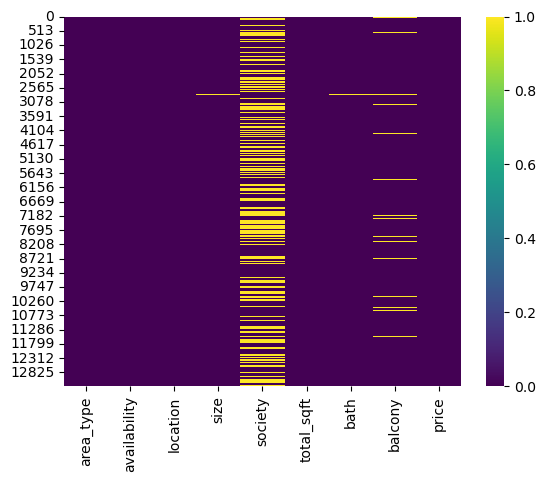

In [123]:
sns.heatmap(df.isnull(),cbar = True, cmap='viridis')

CLEANING DATA - NULL VALUES

In [124]:
df_1 = df.copy()
df_1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


1) Dropping society column

In [125]:
df_1.drop('society', axis=1, inplace=True)
df_1

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


<Axes: >

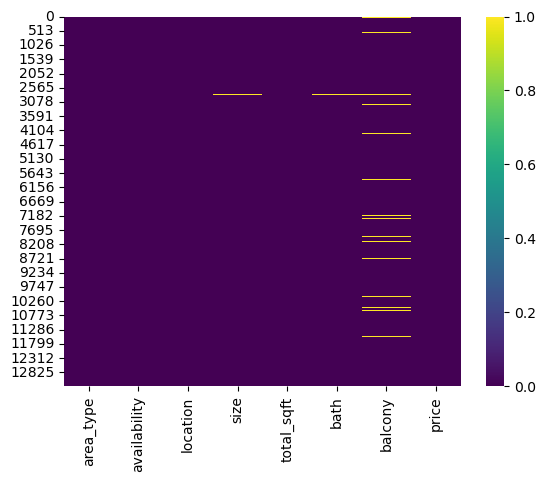

In [126]:
sns.heatmap(df_1.isnull(),cbar = True, cmap='viridis')

In [127]:
df_1.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

2) Balcony - replacing by most_freq

In [128]:
df_si = SimpleImputer(strategy='most_frequent', add_indicator=True)
df_si.fit_transform(df_1[['balcony']])

array([[1., 0.],
       [3., 0.],
       [3., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [129]:
df_2 = df_1.copy()
df_2['balcony'] = df_si.fit_transform(df_1[['balcony']])
df_2

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [130]:
df_2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

3) Since these Nan values are much less in count, we can remove all of them

In [131]:
df_3 = df_2.copy()
df_3.dropna(inplace=True)

In [132]:
df_3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

All null values are gone

<Axes: >

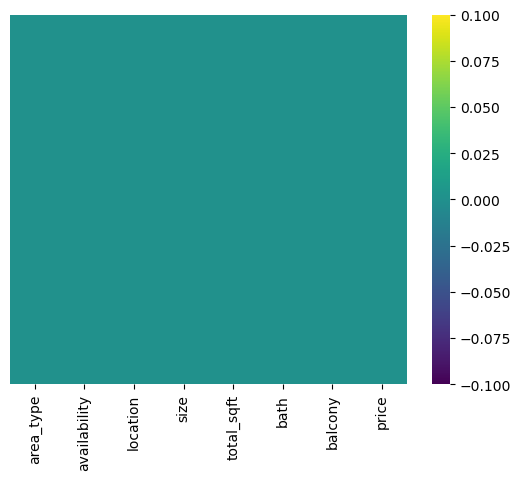

In [133]:
sns.heatmap(df_3.isnull(),yticklabels=False, cbar = True, cmap='viridis')

Now I want to see the unique values present in the columns, if they are way to high then we have to deal with it

In [134]:
(df_3.area_type.value_counts())
# len(df_3.location.unique())

area_type
Super built-up  Area    8740
Built-up  Area          2410
Plot  Area              2009
Carpet  Area              87
Name: count, dtype: int64

In [135]:
(df_3.availability.value_counts())

availability
Ready To Move    10564
18-Dec             297
18-May             291
18-Apr             269
18-Aug             200
                 ...  
15-Dec               1
20-Feb               1
16-Jul               1
14-Nov               1
14-Jul               1
Name: count, Length: 80, dtype: int64

In [136]:
(df_3.location.value_counts())

location
Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1304, dtype: int64

Location has a lot of unique values, but if there a very few houses in that location then it won't be reliable to make prediction using this data

In [137]:
(df_3['size'].value_counts())

size
2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

Here in size, we need to extract decimal values and also we can see both 'Bedroom' and 'BHK' means the same

In [138]:
(df_3.bath.value_counts())

bath
2.0     6908
3.0     3285
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [139]:
(df_3.balcony.value_counts())

balcony
2.0    5648
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

Rest such as total_sqft, price can have any value

4) Dealing with size

In [140]:
df_3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [141]:
df_4 = df_3.copy()
df_4['size'] = df_4['size'].str.replace('Bedroom', 'BHK')
df_4['size'] = df_4['size'].str.replace('RK', 'BHK')
df_4['size'].unique()

array(['2 BHK', '4 BHK', '3 BHK', '6 BHK', '1 BHK', '8 BHK', '7 BHK',
       '5 BHK', '11 BHK', '9 BHK', '27 BHK', '10 BHK', '19 BHK', '16 BHK',
       '43 BHK', '14 BHK', '12 BHK', '13 BHK', '18 BHK'], dtype=object)

In [142]:
df_5 = df_4.copy()
df_5['size'] = df_4['size'].str.extract('(\d+)', expand = False).astype(float)
df_5['BHK'] = df_5['size']
df_5.drop('size',axis=1,inplace=True)
df_5

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,3453,4.0,0.0,231.00,5.0
13316,Super built-up Area,Ready To Move,Richards Town,3600,5.0,2.0,400.00,4.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4689,4.0,1.0,488.00,4.0


Availability is not required

In [143]:
df_5.drop('availability', axis=1, inplace=True)
df_5

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453,4.0,0.0,231.00,5.0
13316,Super built-up Area,Richards Town,3600,5.0,2.0,400.00,4.0
13317,Built-up Area,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2.0
13318,Super built-up Area,Padmanabhanagar,4689,4.0,1.0,488.00,4.0


In [144]:
df_5.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Now we need to deal with these range values of total_sqft - we will replace the range with average values

In [145]:
def is_float(series):
    try:
        float(series)
    except:
        return False
    return True

In [146]:
all_ranges = df_5[df_5.total_sqft.apply(is_float)==False]
all_ranges

,area_type,location,total_sqft,bath,balcony,price,BHK
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,0.0,186.000,4.0
122,Super built-up Area,Hebbal,3067 - 8156,4.0,0.0,477.000,4.0
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2.0
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,0.0,43.490,2.0
188,Super built-up Area,KR Puram,1015 - 1540,2.0,0.0,56.800,2.0
...,...,...,...,...,...,...,...
12975,Super built-up Area,Whitefield,850 - 1060,2.0,0.0,38.190,2.0
12990,Super built-up Area,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3.0
13059,Super built-up Area,Harlur,1200 - 1470,2.0,0.0,72.760,2.0
13265,Super built-up Area,Hoodi,1133 - 1384,2.0,0.0,59.135,2.0


In [147]:
def convert_to_avg(series):
    parts = series.split('-')
    if(len(parts)==2):
        return (float(parts[0]) + float(parts[1]))/2
    try:
        return float(series)
    except:
        return None

In [148]:
df_5['total_sqft'] = df_5['total_sqft'].apply(convert_to_avg)
df_5

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,0.0,231.00,5.0
13316,Super built-up Area,Richards Town,3600.0,5.0,2.0,400.00,4.0
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,1.0,488.00,4.0


In [158]:
df_5.isnull().sum()
df_6 = df_5.copy()
df_6.dropna(inplace=True)
df_6

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,0.0,231.00,5.0
13316,Super built-up Area,Richards Town,3600.0,5.0,2.0,400.00,4.0
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,1.0,488.00,4.0


In [159]:
df_6.isnull().sum()

area_type     0
location      0
total_sqft    0
bath          0
balcony       0
price         0
BHK           0
dtype: int64